# Network Analysis

by: Blaise Geronimo

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import pandas as pd

# Data Loading

In [2]:
# Opening JSON file
f = open('train.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)

In [3]:
df = pd.DataFrame(data)

df

id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]

# Exploratory Data Analysis

In [4]:
ingredient_counts = {}

# Count the occurrences of ingredients in the 'ingredients' column
for ingredients_list in df['ingredients']:
    for ingredient in ingredients_list:
        if ingredient in ingredient_counts:
            ingredient_counts[ingredient] += 1
        else:
            ingredient_counts[ingredient] = 1

# Convert the ingredient counts dictionary to a Pandas DataFrame
ingredient_df = pd.DataFrame({'Ingredient': list(ingredient_counts.keys()), 'Count': list(ingredient_counts.values())})

# Sort the ingredients DataFrame by count in descending order
sorted_ingredients = ingredient_df.sort_values(by='Count', ascending=False)

# Print the top 20 ingredients as a DataFrame
top20 = sorted_ingredients[:20]
top20.reset_index().drop('index', axis = 1)

Ingredient  Count
0                  salt  18049
1             olive oil   7972
2                onions   7972
3                 water   7457
4                garlic   7380
5                 sugar   6434
6         garlic cloves   6237
7                butter   4848
8   ground black pepper   4785
9     all-purpose flour   4632
10               pepper   4438
11        vegetable oil   4385
12                 eggs   3388
13            soy sauce   3296
14          kosher salt   3113
15         green onions   3078
16             tomatoes   3058
17           large eggs   2948
18              carrots   2814
19      unsalted butter   2782

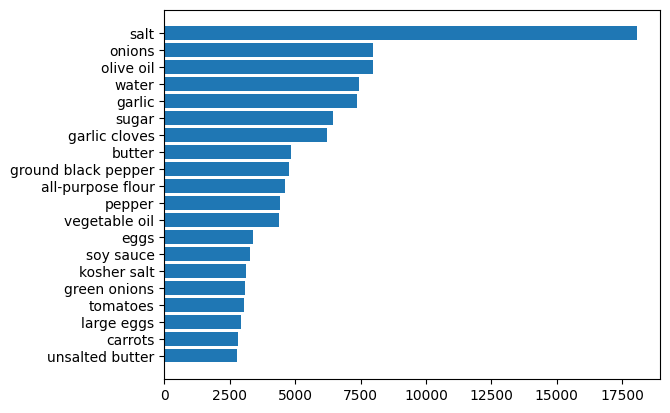

In [5]:
top20 = top20.sort_values(by='Count', ascending=True)

plt.barh(top20['Ingredient'], top20['Count'])

plt.show()

In [6]:
cuisinen = df['cuisine'].value_counts()

cuisinedict = cuisinen.to_dict()
cuisinedict

{'italian': 7838,
 'mexican': 6438,
 'southern_us': 4320,
 'indian': 3003,
 'chinese': 2673,
 'french': 2646,
 'cajun_creole': 1546,
 'thai': 1539,
 'japanese': 1423,
 'greek': 1175,
 'spanish': 989,
 'korean': 830,
 'vietnamese': 825,
 'moroccan': 821,
 'british': 804,
 'filipino': 755,
 'irish': 667,
 'jamaican': 526,
 'russian': 489,
 'brazilian': 467}

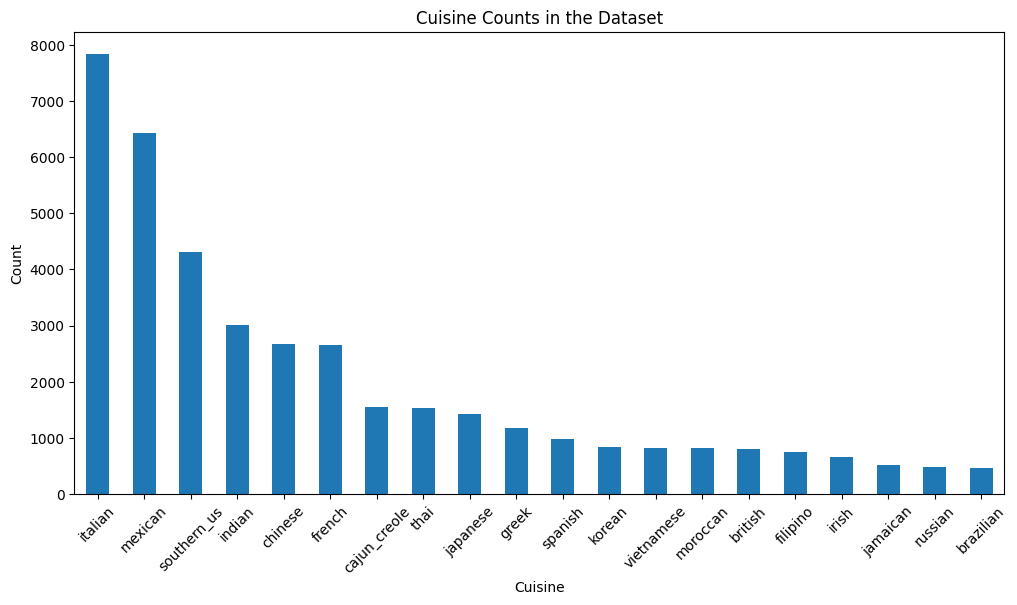

In [7]:
plt.figure(figsize=(12, 6))
cuisinen.plot(kind='bar')
plt.title('Cuisine Counts in the Dataset')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Create an empty dictionary to store ingredient counts for each cuisine
ingredient_counts = {}

# Iterate through the DataFrame and count ingredients for each cuisine
for index, row in df.iterrows():
    cuisine = row['cuisine']
    ingredients_list = row['ingredients']
    
    if cuisine not in ingredient_counts:
        ingredient_counts[cuisine] = {}  # Initialize an empty dictionary for the cuisine
    
    # Count each ingredient within the cuisine
    for ingredient in ingredients_list:
        if ingredient in ingredient_counts[cuisine]:
            ingredient_counts[cuisine][ingredient] += 1
        else:
            ingredient_counts[cuisine][ingredient] = 1

# Print the ingredient counts for each cuisine
# for cuisine, counts in ingredient_counts.items():
#     print(f'Cuisine: {cuisine}')
#    for ingredient, count in counts.items():
#        print(f'{ingredient} : {count}')
#    print()

ingredient_counts

{'greek': {'romaine lettuce': 39,
  'black olives': 31,
  'grape tomatoes': 26,
  'garlic': 216,
  'pepper': 203,
  'purple onion': 186,
  'seasoning': 3,
  'garbanzo beans': 23,
  'feta cheese crumbles': 252,
  'ground pork': 4,
  'finely chopped fresh parsley': 8,
  'onions': 185,
  'salt': 572,
  'vinegar': 3,
  'caul fat': 1,
  'minced garlic': 68,
  'dried oregano': 267,
  'red wine vinegar': 99,
  'olive oil': 504,
  'boneless chop pork': 1,
  'lemon juice': 183,
  'orange': 12,
  'anise': 5,
  'cinnamon sticks': 31,
  'unflavored gelatin': 2,
  'zinfandel': 2,
  'orange blossom honey': 3,
  'sugar': 77,
  'lemon': 129,
  'calimyrna figs': 1,
  'clove': 14,
  'honey': 67,
  'whipping cream': 2,
  'plain whole-milk yogurt': 5,
  'fresh dill': 108,
  'yoghurt': 10,
  'myzithra': 2,
  'large eggs': 72,
  'cheese': 15,
  'feta cheese': 191,
  'phyllo': 12,
  'kefalotyri': 9,
  'ground black pepper': 221,
  'extra-virgin olive oil': 229,
  'hamburger buns': 6,
  'paprika': 20,
  'chop

In [9]:
ingredcount = pd.DataFrame(ingredient_counts)

ingredcount

greek  southern_us  filipino  indian  jamaican  \
romaine lettuce               39.0          8.0       NaN     3.0       NaN   
black olives                  31.0          3.0       NaN     NaN       NaN   
grape tomatoes                26.0         14.0       1.0     5.0       NaN   
garlic                       216.0        259.0     325.0   726.0     139.0   
pepper                       203.0        549.0     199.0   205.0     125.0   
...                            ...          ...       ...     ...       ...   
beluga lentil                  NaN          NaN       NaN     NaN       NaN   
bermuda onion                  NaN          NaN       NaN     NaN       NaN   
snip fresh dill                NaN          NaN       NaN     NaN       NaN   
wild asparagus                 NaN          NaN       NaN     NaN       NaN   
cocktail pumpernickel bread    NaN          NaN       NaN     NaN       NaN   

                             spanish  italian  mexican  chinese  british  \
romaine lettuce                  4.0     33.0    103.0     13.0      NaN   
black olives                     4.0     67.0     92.0      NaN      NaN   
grape tomatoes                   6.0     98.0     53.0      2.0      NaN   
garlic                         128.0   1471.0   1317.0    763.0     34.0   
pepper                         133.0    965.0    806.0    158.0     88.0   
...                              ...      ...      ...      ...      ...   
beluga lentil                    NaN      NaN      NaN      NaN      NaN   
bermuda onion                    NaN      NaN      NaN      NaN      NaN   
snip fresh dill                  NaN      NaN      NaN      NaN      NaN   
wild asparagus                   NaN      NaN      NaN      NaN      NaN   
cocktail pumpernickel bread      NaN      NaN      NaN      NaN      NaN   

                              thai  vietnamese  cajun_creole  brazilian  \
romaine lettuce               20.0        17.0          12.0        NaN   
black olives                   NaN         NaN           2.0        NaN   
grape tomatoes                 4.0         NaN           5.0        NaN   
garlic                       414.0       239.0         370.0       82.0   
pepper                        81.0        71.0         189.0       56.0   
...                            ...         ...           ...        ...   
beluga lentil                  NaN         NaN           NaN        NaN   
bermuda onion                  NaN         NaN           NaN        NaN   
snip fresh dill                NaN         NaN           NaN        NaN   
wild asparagus                 NaN         NaN           NaN        NaN   
cocktail pumpernickel bread    NaN         NaN           NaN        NaN   

                             french  japanese  irish  korean  moroccan  \
romaine lettuce                12.0       NaN    1.0     5.0       NaN   
black olives                   21.0       NaN    NaN     NaN       8.0   
grape tomatoes                 13.0       1.0    NaN     NaN       NaN   
garlic                        214.0     166.0   51.0   303.0     143.0   
pepper                        209.0      62.0   87.0    99.0      94.0   
...                             ...       ...    ...     ...       ...   
beluga lentil                   NaN       NaN    NaN     NaN       NaN   
bermuda onion                   NaN       NaN    NaN     NaN       NaN   
snip fresh dill                 NaN       NaN    NaN     NaN       NaN   
wild asparagus                  NaN       NaN    NaN     NaN       NaN   
cocktail pumpernickel bread     NaN       NaN    NaN     NaN       NaN   

                             russian  
romaine lettuce                  NaN  
black olives                     1.0  
grape tomatoes                   NaN  
garlic                          20.0  
pepper                          59.0  
...                              ...  
beluga lentil                    1.0  
bermuda onion                    1.0  
snip fresh dill           

## Percentage of Salt in all Cuisines

In [10]:
saltdict = pd.Series(ingredcount.loc['salt']).to_dict()

In [11]:
# Initialize an empty DataFrame
dfsalt = pd.DataFrame(columns=['Cuisine', 'Quotient'])

# Create a list to store DataFrames
dfs_to_concat = []

# Calculate the quotients and create DataFrames
for cuisine, value1 in saltdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'salt': [quotient]})
        dfs_to_concat.append(df_to_append)

# Concatenate the DataFrames in the list
if dfs_to_concat:
    dfsalt = pd.concat(dfs_to_concat, ignore_index=True)

dfsalt['salt'] = dfsalt['salt'].round(2)    
dfsalt

Cuisine  salt
0          greek  0.49
1    southern_us  0.53
2       filipino  0.56
3         indian  0.64
4       jamaican  0.63
5        spanish  0.47
6        italian  0.44
7        mexican  0.42
8        chinese  0.34
9        british  0.51
10          thai  0.26
11    vietnamese  0.32
12  cajun_creole  0.48
13     brazilian  0.42
14        french  0.45
15      japanese  0.30
16         irish  0.56
17        korean  0.30
18      moroccan  0.50
19       russian  0.59

## Percentage of Olive Oil in all cuisines

In [12]:
olivedict = pd.Series(ingredcount.loc['olive oil']).to_dict()

In [13]:
# Initialize an empty DataFrame
dfolive = pd.DataFrame(columns=['Cuisine', 'olive'])

dfs_to_concat = []

for cuisine, value1 in olivedict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'olive': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfolive = pd.concat(dfs_to_concat, ignore_index=True)

dfolive['olive'] = dfolive['olive'].round(2)
dfolive

Cuisine  olive
0          greek   0.43
1    southern_us   0.07
2       filipino   0.06
3         indian   0.12
4       jamaican   0.13
5        spanish   0.39
6        italian   0.40
7        mexican   0.20
8        chinese   0.05
9        british   0.07
10          thai   0.07
11    vietnamese   0.05
12  cajun_creole   0.20
13     brazilian   0.25
14        french   0.20
15      japanese   0.04
16         irish   0.07
17        korean   0.04
18      moroccan   0.50
19       russian   0.10

## Percentage of Onions in all Cuisines

In [14]:
oniondict = pd.Series(ingredcount.loc['onions']).to_dict()

In [15]:
dfonion = pd.DataFrame(columns=['Cuisine', 'onions'])

dfs_to_concat = []

for cuisine, value1 in oniondict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'onions': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfonion = pd.concat(dfs_to_concat, ignore_index=True)

dfonion['onions'] = dfonion['onions'].round(2)
dfonion

Cuisine  onions
0          greek    0.16
1    southern_us    0.11
2       filipino    0.41
3         indian    0.40
4       jamaican    0.33
5        spanish    0.26
6        italian    0.16
7        mexican    0.23
8        chinese    0.10
9        british    0.18
10          thai    0.11
11    vietnamese    0.13
12  cajun_creole    0.34
13     brazilian    0.28
14        french    0.14
15      japanese    0.11
16         irish    0.20
17        korean    0.25
18      moroccan    0.34
19       russian    0.30

## Percentage of Water in all cuisines

In [16]:
waterdict = pd.Series(ingredcount.loc['water']).to_dict()

dfwater = pd.DataFrame(columns=['Cuisine', 'water'])

dfs_to_concat = []

for cuisine, value1 in waterdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'water': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfwater = pd.concat(dfs_to_concat, ignore_index=True)

dfwater['water'] = dfwater['water'].round(2)
dfwater

Cuisine  water
0          greek   0.12
1    southern_us   0.16
2       filipino   0.41
3         indian   0.27
4       jamaican   0.29
5        spanish   0.16
6        italian   0.13
7        mexican   0.14
8        chinese   0.29
9        british   0.14
10          thai   0.20
11    vietnamese   0.28
12  cajun_creole   0.18
13     brazilian   0.19
14        french   0.17
15      japanese   0.27
16         irish   0.14
17        korean   0.29
18      moroccan   0.22
19       russian   0.23

## Percentage of Garlic in all cuisines

In [17]:
garlicdict = pd.Series(ingredcount.loc['garlic']).to_dict()

dfgarlic = pd.DataFrame(columns=['Cuisine', 'garlic'])

dfs_to_concat = []

for cuisine, value1 in garlicdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'garlic': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfgarlic = pd.concat(dfs_to_concat, ignore_index=True)

dfgarlic['garlic'] = dfgarlic['garlic'].round(2)
dfgarlic

Cuisine  garlic
0          greek    0.18
1    southern_us    0.06
2       filipino    0.43
3         indian    0.24
4       jamaican    0.26
5        spanish    0.13
6        italian    0.19
7        mexican    0.20
8        chinese    0.29
9        british    0.04
10          thai    0.27
11    vietnamese    0.29
12  cajun_creole    0.24
13     brazilian    0.18
14        french    0.08
15      japanese    0.12
16         irish    0.08
17        korean    0.37
18      moroccan    0.17
19       russian    0.04

## Sugar

In [18]:
sugardict = pd.Series(ingredcount.loc['sugar']).to_dict()

dfsugar = pd.DataFrame(columns=['Cuisine', 'sugar'])

dfs_to_concat = []

for cuisine, value1 in sugardict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'sugar': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfsugar = pd.concat(dfs_to_concat, ignore_index=True)

dfsugar['sugar'] = dfsugar['sugar'].round(2)
dfsugar

Cuisine  sugar
0          greek   0.07
1    southern_us   0.24
2       filipino   0.18
3         indian   0.11
4       jamaican   0.15
5        spanish   0.13
6        italian   0.10
7        mexican   0.05
8        chinese   0.31
9        british   0.22
10          thai   0.21
11    vietnamese   0.42
12  cajun_creole   0.08
13     brazilian   0.15
14        french   0.24
15      japanese   0.28
16         irish   0.18
17        korean   0.32
18      moroccan   0.10
19       russian   0.32

## Garlic Cloves

In [19]:
gaclodict = pd.Series(ingredcount.loc['garlic cloves']).to_dict()

dfgaclo = pd.DataFrame(columns=['Cuisine', 'garlic cloves'])

dfs_to_concat = []

for cuisine, value1 in gaclodict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'garlic cloves': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfgaclo = pd.concat(dfs_to_concat, ignore_index=True)

dfgaclo['garlic cloves'] = dfgaclo['garlic cloves'].round(2)
dfgaclo

Cuisine  garlic cloves
0          greek           0.22
1    southern_us           0.07
2       filipino           0.12
3         indian           0.15
4       jamaican           0.19
5        spanish           0.29
6        italian           0.21
7        mexican           0.14
8        chinese           0.16
9        british           0.04
10          thai           0.19
11    vietnamese           0.18
12  cajun_creole           0.18
13     brazilian           0.18
14        french           0.15
15      japanese           0.06
16         irish           0.05
17        korean           0.20
18      moroccan           0.27
19       russian           0.09

## Butter

In [20]:
butterdict = pd.Series(ingredcount.loc['butter']).to_dict()

dfbutter = pd.DataFrame(columns=['Cuisine', 'butter'])

dfs_to_concat = []

for cuisine, value1 in butterdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'butter': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfbutter = pd.concat(dfs_to_concat, ignore_index=True)

dfbutter['butter'] = dfbutter['butter'].round(2)
dfbutter

Cuisine  butter
0          greek    0.08
1    southern_us    0.29
2       filipino    0.08
3         indian    0.09
4       jamaican    0.12
5        spanish    0.05
6        italian    0.13
7        mexican    0.06
8        chinese    0.02
9        british    0.28
10          thai    0.02
11    vietnamese    0.01
12  cajun_creole    0.22
13     brazilian    0.10
14        french    0.19
15      japanese    0.05
16         irish    0.33
17        korean    0.01
18      moroccan    0.07
19       russian    0.21

## Ground Black Pepper

In [21]:
gbpdict = pd.Series(ingredcount.loc['ground black pepper']).to_dict()

dfgbp = pd.DataFrame(columns=['Cuisine', 'ground black pepper'])

dfs_to_concat = []

for cuisine, value1 in gbpdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'ground black pepper': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfgbp = pd.concat(dfs_to_concat, ignore_index=True)

dfgbp['ground black pepper'] = dfgbp['ground black pepper'].round(2)
dfgbp

Cuisine  ground black pepper
0          greek                 0.19
1    southern_us                 0.11
2       filipino                 0.16
3         indian                 0.07
4       jamaican                 0.17
5        spanish                 0.15
6        italian                 0.18
7        mexican                 0.09
8        chinese                 0.06
9        british                 0.09
10          thai                 0.03
11    vietnamese                 0.13
12  cajun_creole                 0.17
13     brazilian                 0.10
14        french                 0.15
15      japanese                 0.05
16         irish                 0.10
17        korean                 0.11
18      moroccan                 0.18
19       russian                 0.11

## All Purpose flour

In [22]:
apfdict = pd.Series(ingredcount.loc['all-purpose flour']).to_dict()

dfapf = pd.DataFrame(columns=['Cuisine', 'all-purpose flour'])

dfs_to_concat = []

for cuisine, value1 in apfdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'all-purpose flour': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfapf = pd.concat(dfs_to_concat, ignore_index=True)

dfapf['all-purpose flour'] = dfapf['all-purpose flour'].round(2)
dfapf

Cuisine  all-purpose flour
0          greek               0.09
1    southern_us               0.28
2       filipino               0.04
3         indian               0.05
4       jamaican               0.08
5        spanish               0.05
6        italian               0.12
7        mexican               0.05
8        chinese               0.05
9        british               0.30
10          thai               0.01
11    vietnamese               0.01
12  cajun_creole               0.19
13     brazilian               0.04
14        french               0.22
15      japanese               0.05
16         irish               0.33
17        korean               0.04
18      moroccan               0.05
19       russian               0.25

## Pepper

In [23]:
pepdict = pd.Series(ingredcount.loc['pepper']).to_dict()

dfpep = pd.DataFrame(columns=['Cuisine', 'pepper'])

dfs_to_concat = []

for cuisine, value1 in pepdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'pepper': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfpep = pd.concat(dfs_to_concat, ignore_index=True)

dfpep['pepper'] = dfpep['pepper'].round(2)
dfpep

Cuisine  pepper
0          greek    0.17
1    southern_us    0.13
2       filipino    0.26
3         indian    0.07
4       jamaican    0.24
5        spanish    0.13
6        italian    0.12
7        mexican    0.13
8        chinese    0.06
9        british    0.11
10          thai    0.05
11    vietnamese    0.09
12  cajun_creole    0.12
13     brazilian    0.12
14        french    0.08
15      japanese    0.04
16         irish    0.13
17        korean    0.12
18      moroccan    0.11
19       russian    0.12

# Vegetable Oil

In [24]:
vodict = pd.Series(ingredcount.loc['vegetable oil']).to_dict()

dfvo = pd.DataFrame(columns=['Cuisine', 'vegetable oil'])

dfs_to_concat = []

for cuisine, value1 in vodict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'vegetable oil': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfvo = pd.concat(dfs_to_concat, ignore_index=True)

dfvo['vegetable oil'] = dfvo['vegetable oil'].round(2)
dfvo

Cuisine  vegetable oil
0          greek           0.02
1    southern_us           0.10
2       filipino           0.13
3         indian           0.20
4       jamaican           0.18
5        spanish           0.05
6        italian           0.03
7        mexican           0.12
8        chinese           0.23
9        british           0.07
10          thai           0.22
11    vietnamese           0.18
12  cajun_creole           0.16
13     brazilian           0.09
14        french           0.04
15      japanese           0.17
16         irish           0.06
17        korean           0.14
18      moroccan           0.05
19       russian           0.14

## Eggs

In [25]:
eggdict = pd.Series(ingredcount.loc['eggs']).to_dict()

dfegg = pd.DataFrame(columns=['Cuisine', 'eggs'])

dfs_to_concat = []

for cuisine, value1 in eggdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'eggs': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfegg = pd.concat(dfs_to_concat, ignore_index=True)

dfegg['eggs'] = dfegg['eggs'].round(2)
dfegg

Cuisine  eggs
0          greek  0.07
1    southern_us  0.14
2       filipino  0.12
3         indian  0.03
4       jamaican  0.08
5        spanish  0.09
6        italian  0.08
7        mexican  0.05
8        chinese  0.11
9        british  0.24
10          thai  0.07
11    vietnamese  0.04
12  cajun_creole  0.06
13     brazilian  0.11
14        french  0.07
15      japanese  0.10
16         irish  0.13
17        korean  0.13
18      moroccan  0.04
19       russian  0.23

## Soy Sauce

In [26]:
ssdict = pd.Series(ingredcount.loc['soy sauce']).to_dict()

dfss = pd.DataFrame(columns=['Cuisine', 'soy sauce'])

dfs_to_concat = []

for cuisine, value1 in ssdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'soy sauce': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfss = pd.concat(dfs_to_concat, ignore_index=True)

dfss['soy sauce'] = dfss['soy sauce'].round(2)
dfss

Cuisine  soy sauce
0          greek       0.00
1    southern_us       0.00
2       filipino       0.33
3         indian       0.01
4       jamaican       0.13
5        spanish       0.00
6        italian       0.00
7        mexican       0.01
8        chinese       0.51
9        british       0.00
10          thai       0.22
11    vietnamese       0.19
12  cajun_creole       0.01
13     brazilian       0.00
14        french       0.00
15      japanese       0.39
16         irish       0.01
17        korean       0.51
18      moroccan       0.00
19       russian       0.01

## Kosher Salt

In [27]:
ksdict = pd.Series(ingredcount.loc['kosher salt']).to_dict()

dfks = pd.DataFrame(columns=['Cuisine', 'kosher salt'])

dfs_to_concat = []

for cuisine, value1 in ksdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'kosher salt': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfks = pd.concat(dfs_to_concat, ignore_index=True)

dfks['kosher salt'] = dfks['kosher salt'].round(2)
dfks

Cuisine  kosher salt
0          greek         0.07
1    southern_us         0.08
2       filipino         0.03
3         indian         0.08
4       jamaican         0.06
5        spanish         0.12
6        italian         0.08
7        mexican         0.09
8        chinese         0.07
9        british         0.07
10          thai         0.05
11    vietnamese         0.11
12  cajun_creole         0.07
13     brazilian         0.05
14        french         0.06
15      japanese         0.06
16         irish         0.05
17        korean         0.09
18      moroccan         0.11
19       russian         0.04

## Green Onions

In [28]:
godict = pd.Series(ingredcount.loc['green onions']).to_dict()

dfgo = pd.DataFrame(columns=['Cuisine', 'green onions'])

dfs_to_concat = []

for cuisine, value1 in godict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'green onions': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfgo = pd.concat(dfs_to_concat, ignore_index=True)

dfgo['green onions'] = dfgo['green onions'].round(2)
dfgo

Cuisine  green onions
0          greek          0.05
1    southern_us          0.04
2       filipino          0.09
3         indian          0.01
4       jamaican          0.12
5        spanish          0.03
6        italian          0.02
7        mexican          0.10
8        chinese          0.23
9        british          0.01
10          thai          0.17
11    vietnamese          0.14
12  cajun_creole          0.17
13     brazilian          0.05
14        french          0.02
15      japanese          0.12
16         irish          0.04
17        korean          0.35
18      moroccan          0.02
19       russian          0.04

## Tomatoes

In [29]:
tomdict = pd.Series(ingredcount.loc['tomatoes']).to_dict()

dftom = pd.DataFrame(columns=['Cuisine', 'tomatoes'])

dfs_to_concat = []

for cuisine, value1 in tomdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'tomatoes': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dftom = pd.concat(dfs_to_concat, ignore_index=True)

dftom['tomatoes'] = dftom['tomatoes'].round(2)
dftom

Cuisine  tomatoes
0          greek      0.13
1    southern_us      0.03
2       filipino      0.07
3         indian      0.17
4       jamaican      0.07
5        spanish      0.15
6        italian      0.08
7        mexican      0.14
8        chinese      0.01
9        british      0.01
10          thai      0.03
11    vietnamese      0.03
12  cajun_creole      0.07
13     brazilian      0.13
14        french      0.05
15      japanese      0.03
16         irish      0.01
17        korean      0.00
18      moroccan      0.09
19       russian      0.04

## Large Eggs

In [30]:
ledict = pd.Series(ingredcount.loc['large eggs']).to_dict()

dfle = pd.DataFrame(columns=['Cuisine', 'large eggs'])

dfs_to_concat = []

for cuisine, value1 in ledict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'large eggs': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfle = pd.concat(dfs_to_concat, ignore_index=True)

dfle['large eggs'] = dfle['large eggs'].round(2)
dfle

Cuisine  large eggs
0          greek        0.06
1    southern_us        0.17
2       filipino        0.02
3         indian        0.01
4       jamaican        0.03
5        spanish        0.12
6        italian        0.08
7        mexican        0.03
8        chinese        0.05
9        british        0.14
10          thai        0.04
11    vietnamese        0.02
12  cajun_creole        0.05
13     brazilian        0.04
14        french        0.16
15      japanese        0.05
16         irish        0.12
17        korean        0.04
18      moroccan        0.03
19       russian        0.17

## Carrots

In [31]:
cardict = pd.Series(ingredcount.loc['carrots']).to_dict()

dfcar = pd.DataFrame(columns=['Cuisine', 'carrots'])

dfs_to_concat = []

for cuisine, value1 in cardict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'carrots': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfcar = pd.concat(dfs_to_concat, ignore_index=True)

dfcar['carrots'] = dfcar['carrots'].round(2)
dfcar

Cuisine  carrots
0          greek     0.03
1    southern_us     0.03
2       filipino     0.17
3         indian     0.07
4       jamaican     0.08
5        spanish     0.04
6        italian     0.05
7        mexican     0.02
8        chinese     0.11
9        british     0.07
10          thai     0.11
11    vietnamese     0.24
12  cajun_creole     0.03
13     brazilian     0.06
14        french     0.08
15      japanese     0.13
16         irish     0.16
17        korean     0.20
18      moroccan     0.19
19       russian     0.16

## Unsalted Butter

In [32]:
ubdict = pd.Series(ingredcount.loc['unsalted butter']).to_dict()

dfub = pd.DataFrame(columns=['Cuisine', 'unsalted butter'])

dfs_to_concat = []

for cuisine, value1 in ubdict.items():
    if cuisine in cuisinedict:
        value2 = cuisinedict[cuisine]
        quotient = value1 / value2
        df_to_append = pd.DataFrame({'Cuisine': [cuisine], 'unsalted butter': [quotient]})
        dfs_to_concat.append(df_to_append)

if dfs_to_concat:
    dfub = pd.concat(dfs_to_concat, ignore_index=True)

dfub['unsalted butter'] = dfub['unsalted butter'].round(2)
dfub

Cuisine  unsalted butter
0          greek             0.05
1    southern_us             0.15
2       filipino             0.01
3         indian             0.02
4       jamaican             0.04
5        spanish             0.04
6        italian             0.07
7        mexican             0.02
8        chinese             0.01
9        british             0.24
10          thai             0.01
11    vietnamese             0.01
12  cajun_creole             0.08
13     brazilian             0.05
14        french             0.22
15      japanese             0.01
16         irish             0.13
17        korean             0.00
18      moroccan             0.05
19       russian             0.19

In [33]:
dfs = [dfsalt, dfolive, dfonion, dfwater, dfgarlic, dfsugar, dfgaclo, 
      dfbutter, dfgbp, dfapf, dfpep, dfvo, dfegg, dfss, dfks, dfgo, 
      dftom, dfle, dfcar, dfub]

concatenated_dfs = []

for i, df in enumerate(dfs):
    # Check if it's the first DataFrame
    if i == 0:
        concatenated_dfs.append(df)
    else:
        # For other DataFrames, drop the 'Cuisine' column
        df = df.drop('Cuisine', axis=1)
        concatenated_dfs.append(df)

final_df = pd.concat(concatenated_dfs, axis=1)

final_df

final_df.index = final_df['Cuisine']
final_df = final_df.drop('Cuisine', axis = 1)
final_df

salt  olive  onions  water  garlic  sugar  garlic cloves  \
Cuisine                                                                  
greek         0.49   0.43    0.16   0.12    0.18   0.07           0.22   
southern_us   0.53   0.07    0.11   0.16    0.06   0.24           0.07   
filipino      0.56   0.06    0.41   0.41    0.43   0.18           0.12   
indian        0.64   0.12    0.40   0.27    0.24   0.11           0.15   
jamaican      0.63   0.13    0.33   0.29    0.26   0.15           0.19   
spanish       0.47   0.39    0.26   0.16    0.13   0.13           0.29   
italian       0.44   0.40    0.16   0.13    0.19   0.10           0.21   
mexican       0.42   0.20    0.23   0.14    0.20   0.05           0.14   
chinese       0.34   0.05    0.10   0.29    0.29   0.31           0.16   
british       0.51   0.07    0.18   0.14    0.04   0.22           0.04   
thai          0.26   0.07    0.11   0.20    0.27   0.21           0.19   
vietnamese    0.32   0.05    0.13   0.28    0.29   0.42           0.18   
cajun_creole  0.48   0.20    0.34   0.18    0.24   0.08           0.18   
brazilian     0.42   0.25    0.28   0.19    0.18   0.15           0.18   
french        0.45   0.20    0.14   0.17    0.08   0.24           0.15   
japanese      0.30   0.04    0.11   0.27    0.12   0.28           0.06   
irish         0.56   0.07    0.20   0.14    0.08   0.18           0.05   
korean        0.30   0.04    0.25   0.29    0.37   0.32           0.20   
moroccan      0.50   0.50    0.34   0.22    0.17   0.10           0.27   
russian       0.59   0.10    0.30   0.23    0.04   0.32           0.09   

              butter  ground black pepper  all-purpose flour  pepper  \
Cuisine                                                                
greek           0.08                 0.19               0.09    0.17   
southern_us     0.29                 0.11               0.28    0.13   
filipino        0.08                 0.16               0.04    0.26   
indian          0.09                 0.07               0.05    0.07   
jamaican        0.12                 0.17               0.08    0.24   
spanish         0.05                 0.15               0.05    0.13   
italian         0.13                 0.18               0.12    0.12   
mexican         0.06                 0.09               0.05    0.13   
chinese         0.02                 0.06               0.05    0.06   
british         0.28                 0.09               0.30    0.11   
thai            0.02                 0.03               0.01    0.05   
vietnamese      0.01                 0.13               0.01    0.09   
cajun_creole    0.22                 0.17               0.19    0.12   
brazilian       0.10                 0.10               0.04    0.12   
french          0.19                 0.15               0.22    0.08   
japanese        0.05                 0.05               0.05    0.04   
irish           0.33                 0.10               0.33    0.13   
korean          0.01                 0.11               0.04    0.12   
moroccan        0.07                 0.18               0.05    0.11   
russian         0.21                 0.11               0.25    0.12   

              vegetable oil  eggs  soy sauce  kosher salt  green onions  \
Cuisine                                                                   
greek                  0.02  0.07       0.00         0.07          0.05   
southern_us            0.10  0.14       0.00         0.08          0.04   
filipino               0.13  0.12       0.33         0.03          0.09   
indian                 0.20  0.03       0.01         0.08          0.01   
jamaican               0.18  0.08       0.13         0.06          0.12   
spanish                0.05  0.09       0.00         0.12          0.03   
italian                0.03  0.08       0.00         0.08          0.02   
mexican                0.12  0.05       0.01         0.09          0.10   
chinese                0.23  0.11       0.51      

## Network Graph Between Cuisines and Ingredients

In [34]:
df.columns

Index(['unsalted butter'], dtype='object')

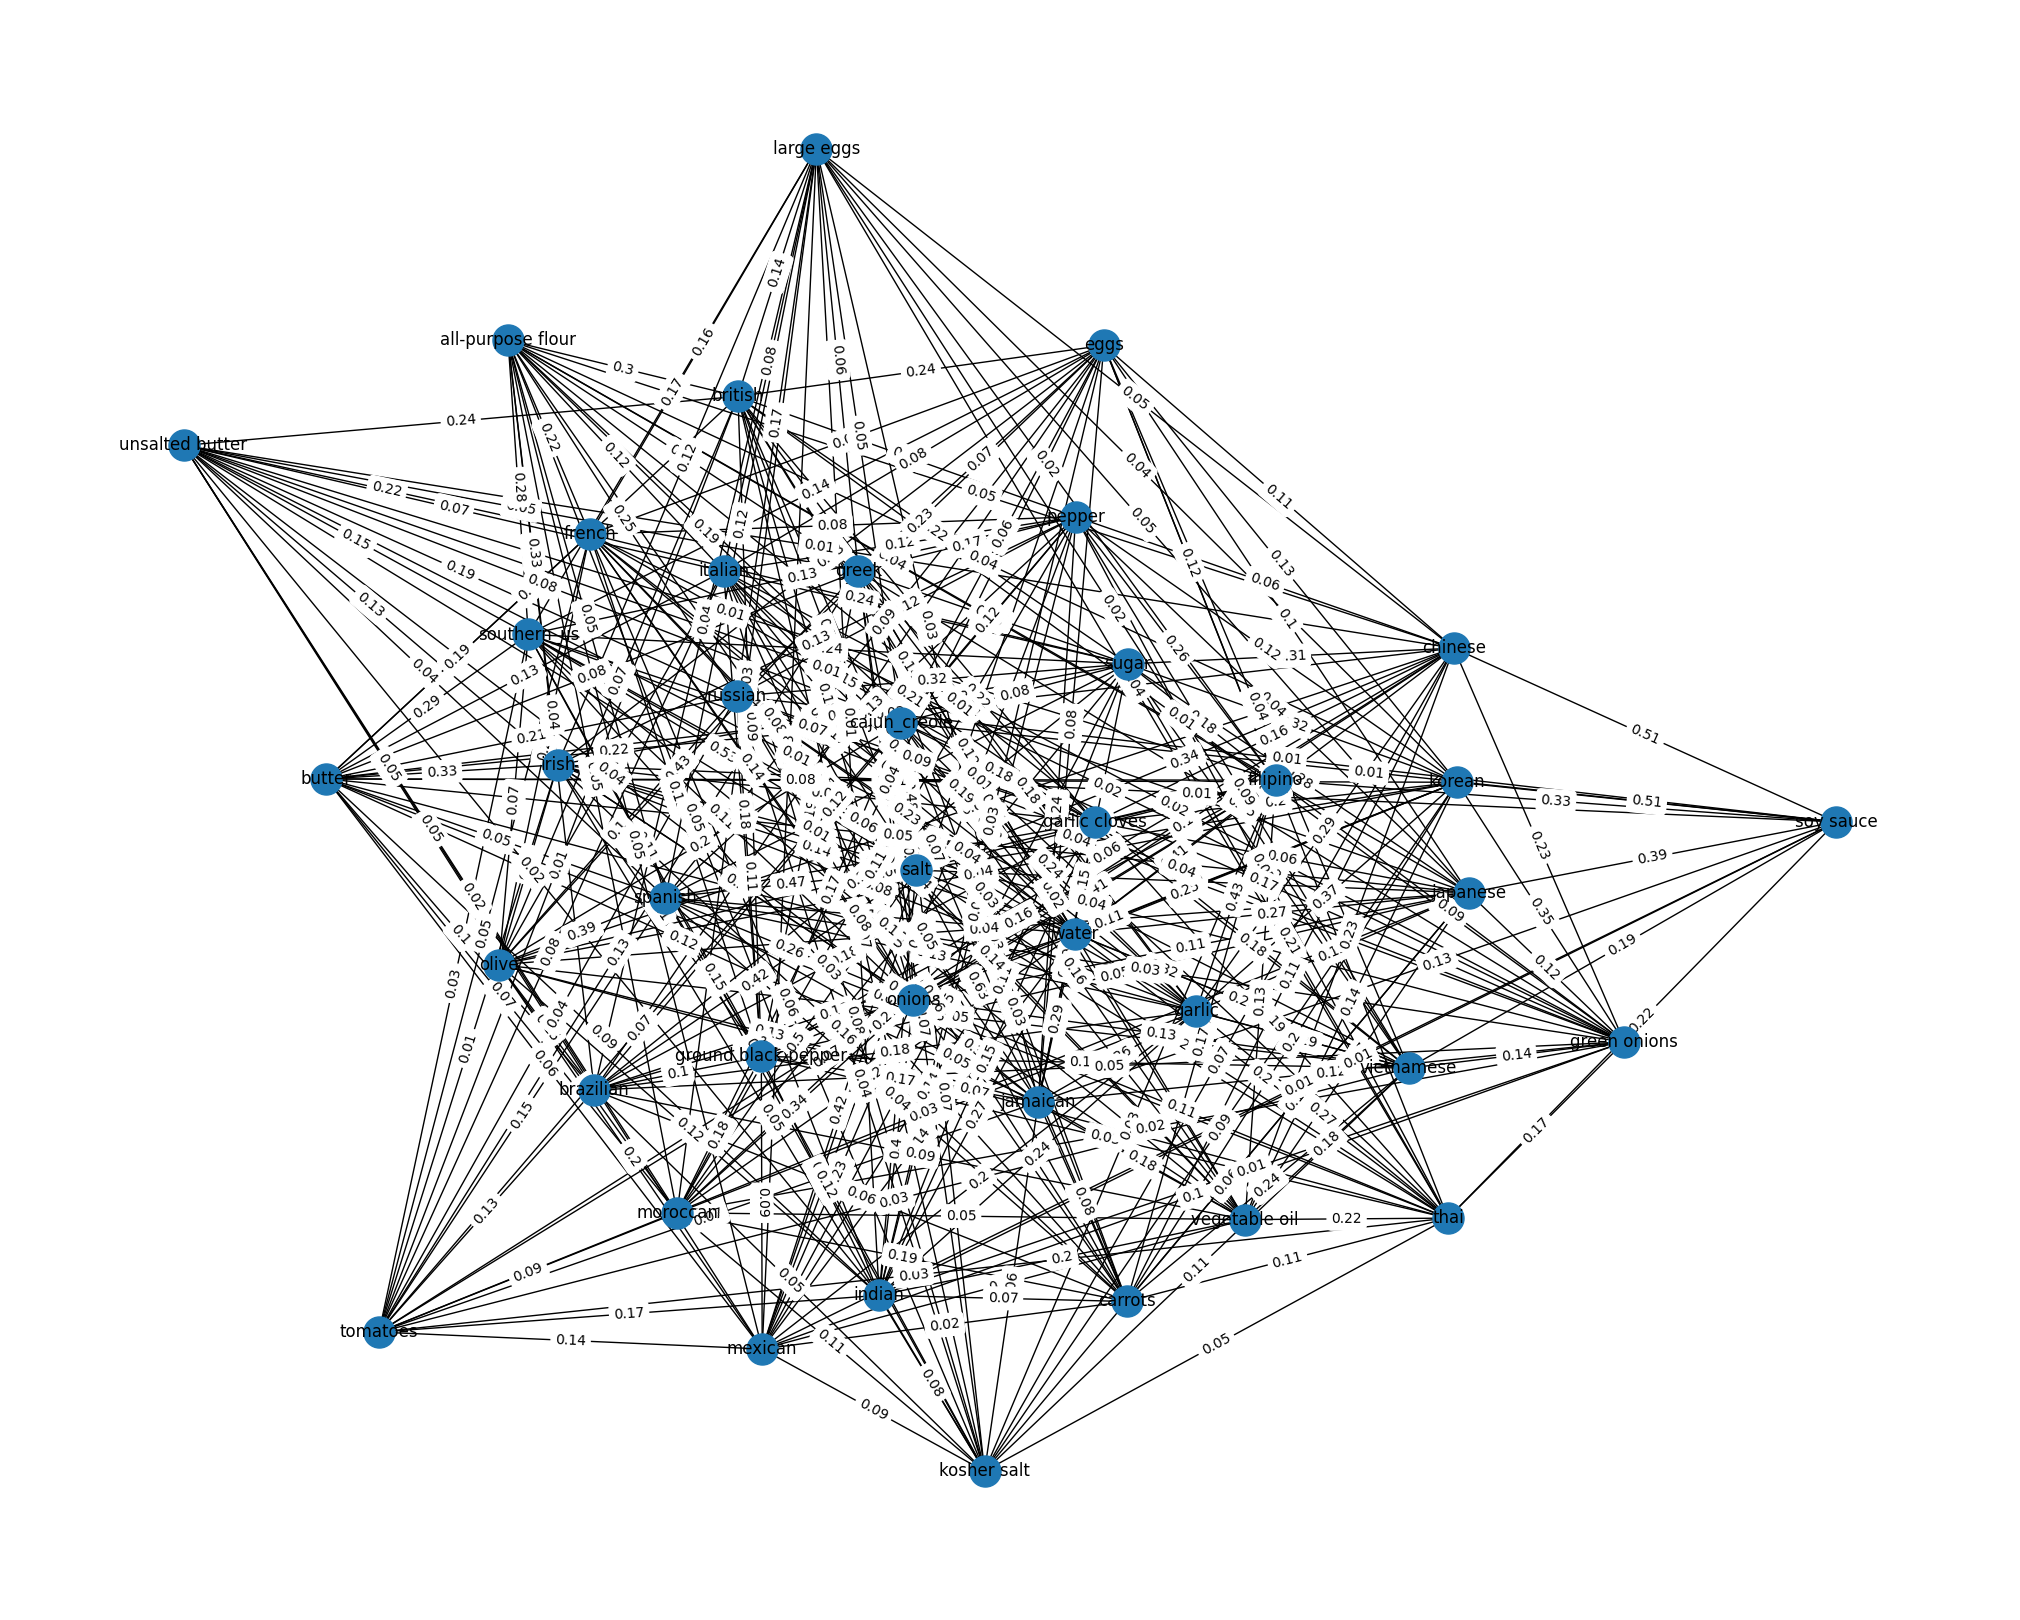

In [35]:
G = nx.Graph()

# Create nodes and edges based on the DataFrame
for row_node in final_df.index:
    for col_node in final_df.columns:
        weight = final_df.at[row_node, col_node]
        if weight > 0:  
            G.add_edge(row_node, col_node, weight=weight)
            
pos = nx.spring_layout(G)  # Position the nodes for visualization

plt.figure(figsize=(20, 16))

# Draw the graph with labels and edge weights
nx.draw(G, pos, with_labels=True, node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

After computation of the 'weights' of each ingredients in each particular cuisine, the network graph above was created. The network graph is composed of the different. This type of graph would help us determine the centralities of the data set. Centralities in this context may be referred to as how common a certain ingredient is. In this data set, salt, onion, water, black pepper and sugar tends to be in the middle. This may mean that all the other ingredients are commonly paired with these primary 5 ingredients as well as most of the cuisines have these primary 5 ingredients in all their recipes.

A graph without the weights indicated may be seen below for easier consumption.

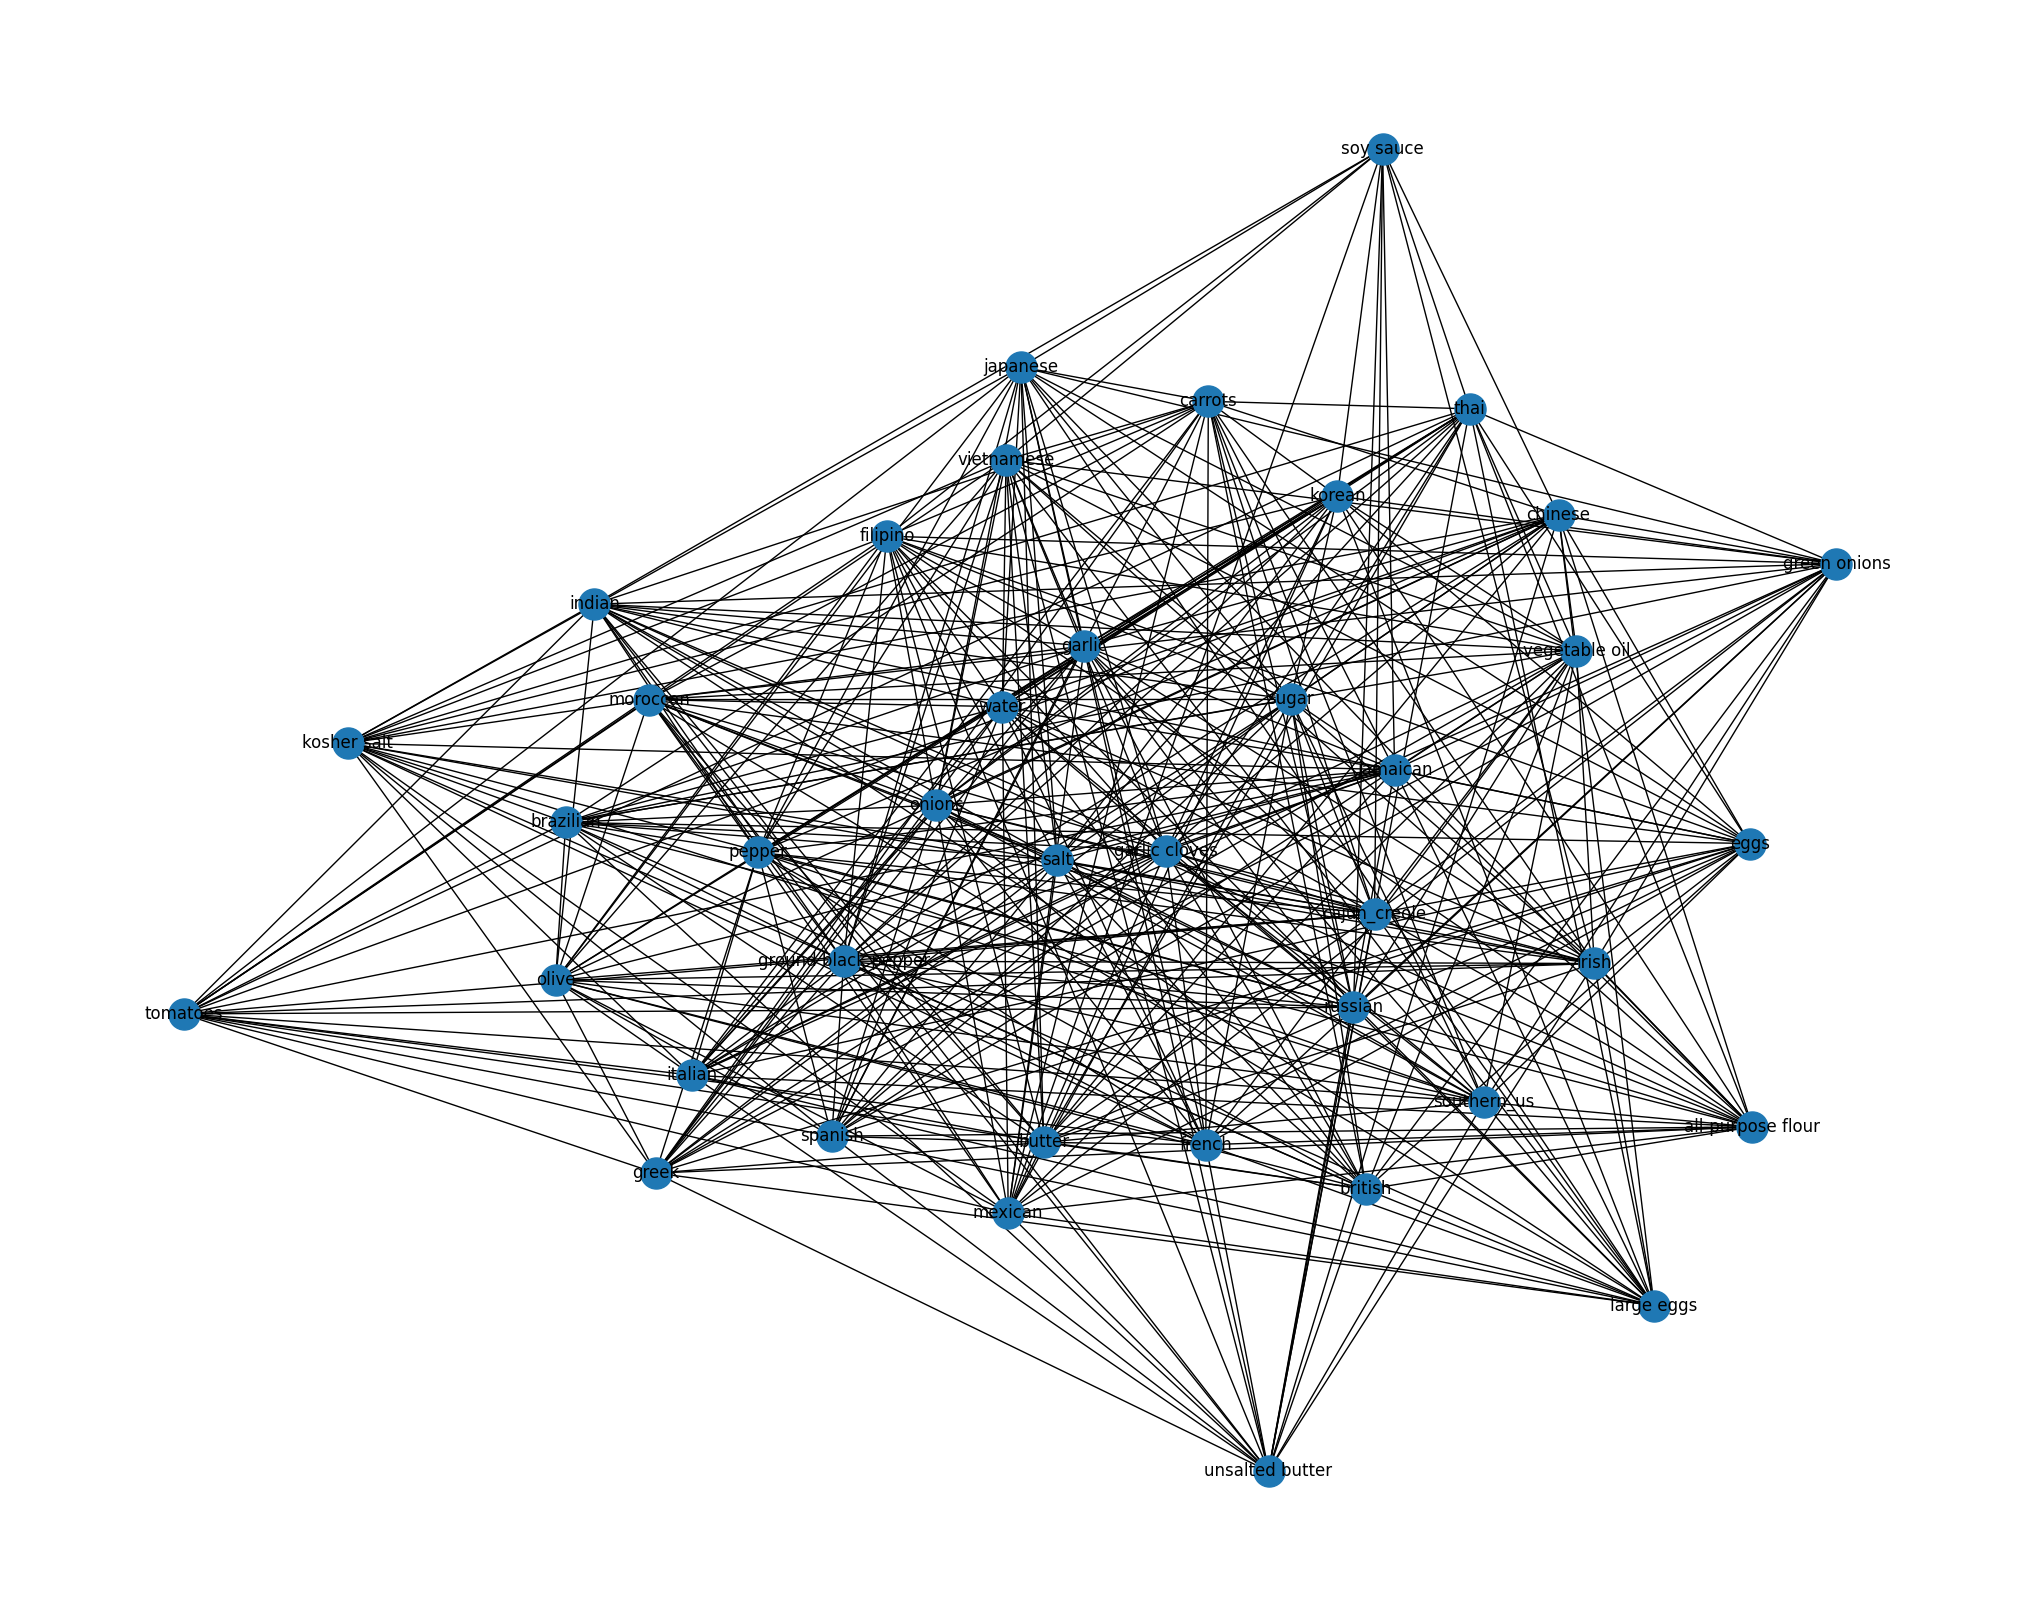

In [36]:
G = nx.Graph()

# Create nodes and edges based on the DataFrame
for row_node in final_df.index:
    for col_node in final_df.columns:
        weight = final_df.at[row_node, col_node]
        if weight > 0: 
            G.add_edge(row_node, col_node, weight=weight)
            
pos = nx.spring_layout(G)  # Position the nodes for visualization

plt.figure(figsize=(20, 16))

# No weight labels
nx.draw(G, pos, with_labels=True, node_size=500)
# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

## Bipartite graph between ingredients and cuisine

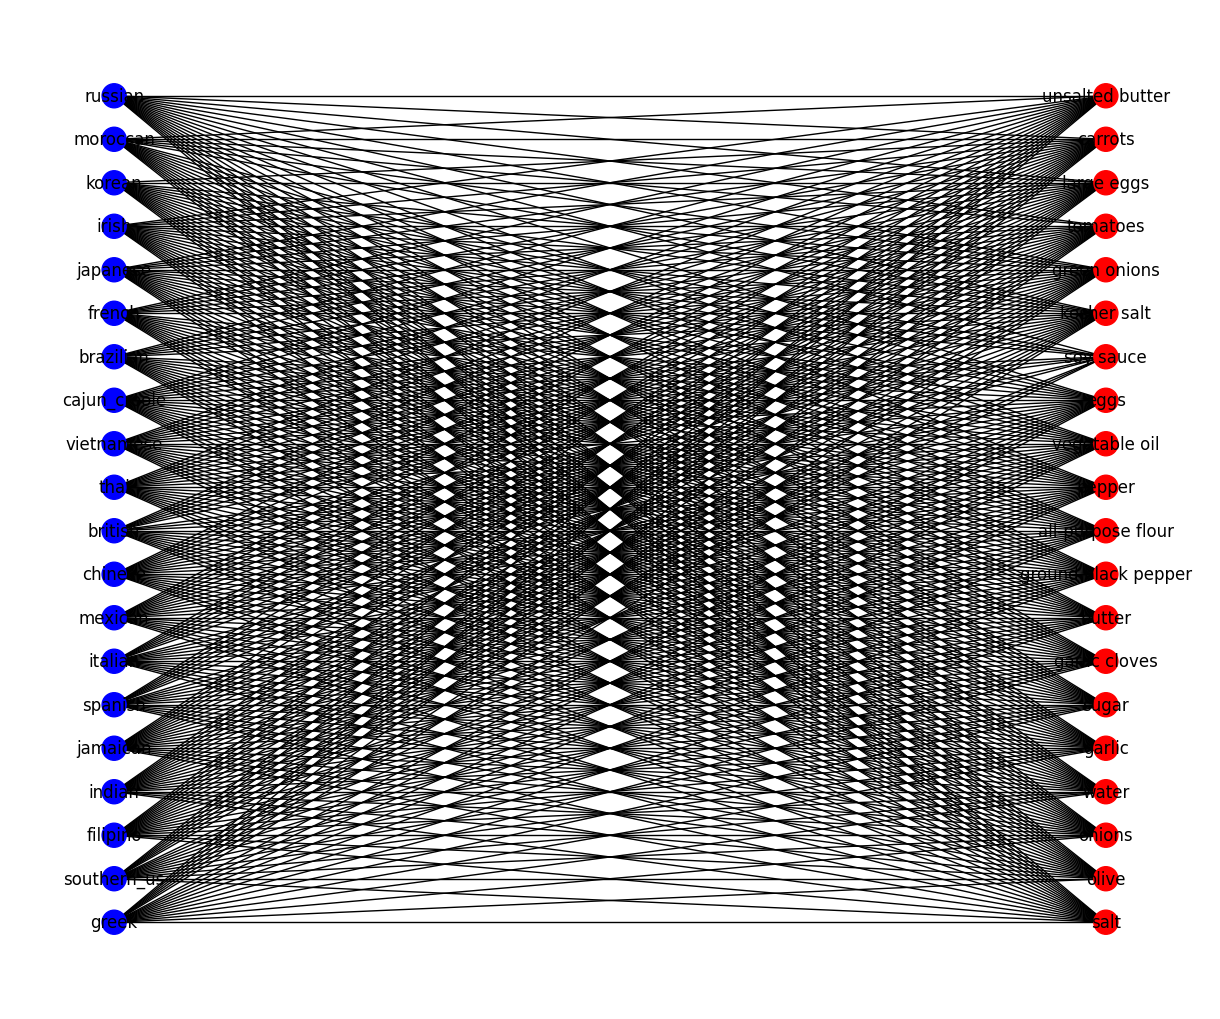

In [37]:
G = nx.Graph()

# Create nodes for the two sets
row_nodes = list(final_df.index)
col_nodes = list(final_df.columns)

G.add_nodes_from(row_nodes, bipartite=0)  # Set the attribute "bipartite" to 0 for row nodes
G.add_nodes_from(col_nodes, bipartite=1)  # Set the attribute "bipartite" to 1 for column nodes

# Create edges with weights
for row_node in row_nodes:
    for col_node in col_nodes:
        weight = final_df.loc[row_node, col_node]
        if weight > 0:
            G.add_edge(row_node, col_node, weight=weight)
            
pos = {
    node: (0, i) for i, node in enumerate(row_nodes)
}
pos.update({
    node: (1, i) for i, node in enumerate(col_nodes)
})

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color=['b' if G.nodes[node]['bipartite'] == 0 else 'r' for node in G.nodes()])
plt.show()



Above is a bipartite graph between ingredients and each cuisine. It is evident that the top 20 ingredients are present in each cuisine. Since the top 20 ingredients are present in each cuisine, then it can also be concluded that these ingredients are very common. Hence, they may be products that can be sold at a lower price and are present as house ingredients.

As someone who used to cook regularly during the pandemic, I can attest that these are very common ingredients that are in each household and used in almost every type of food. Especially, onions, garlic, vegetable oil, pepper and tomatoes.

## When weight is > 0.49

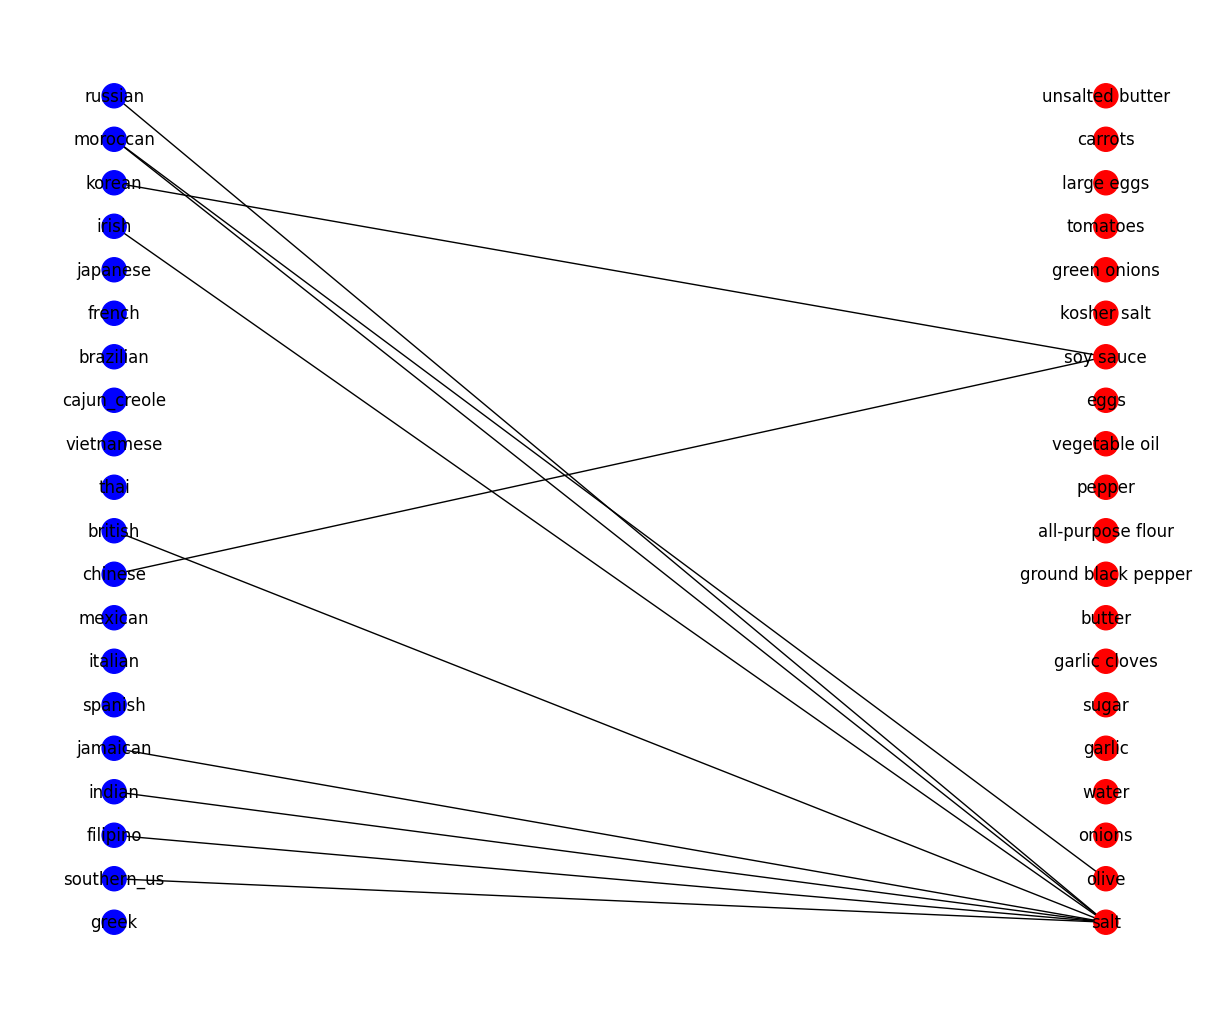

In [38]:
G = nx.Graph()

# Create nodes for the two sets
row_nodes = list(final_df.index)
col_nodes = list(final_df.columns)

G.add_nodes_from(row_nodes, bipartite=0)  # Set the attribute "bipartite" to 0 for row nodes
G.add_nodes_from(col_nodes, bipartite=1)  # Set the attribute "bipartite" to 1 for column nodes

# Create edges with weights
for row_node in row_nodes:
    for col_node in col_nodes:
        weight = final_df.loc[row_node, col_node]
        if weight > 0.49:
            G.add_edge(row_node, col_node, weight=weight)
            
pos = {
    node: (0, i) for i, node in enumerate(row_nodes)
}
pos.update({
    node: (1, i) for i, node in enumerate(col_nodes)
})

plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color=['b' if G.nodes[node]['bipartite'] == 0 else 'r' for node in G.nodes()])
plt.show()



The above graph is when the ingredient is present in at least half of the cuisines recipes. Meaning the ingredients connected are common in such cuisine. 

Specifically, salt seems to be common in many cuisines namely, southern_us, filipino, indian, jamaican, british, irish, moroccan and russian. Although this does not hint that these cuisines have a certain similarity. Since salt is used a common condiment in many dishes anyway.

Olive is present in many moroccan dishes as well. According to this link(https://delishably.com/world-cuisine/Olive-Guide-for-Morocco), Morocco has the best variety of olives for cooking. Which makes sense as to why the cuisin utilizes the ingredient a lot.

Soy Sauce has east asian traditions by itself(https://www.britannica.com/topic/soy-sauce), which makes perfect sense as to why it is a very common ingredient in chinese and korean food. It is quite perplexing that it is not present much in japanese cooking. However, it can be worth noting that the japanese may be using more different kinds of soy sauce which did not meet this data set.